# Analyse images from LED display video

In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = 'video-frames'
image_dir = 'images'

## Load LED display video file and extract frames

In [3]:
filename = 'IMG_8208_fire2.mov'
video_dir = 'videos'
frames_dir = 'video-frames'
image_dir = 'images'

vidcap = cv2.VideoCapture(os.path.join(video_dir, filename))
vidcap

<VideoCapture 0x1216f91b0>

In [4]:
success, image = vidcap.read()
count = 0
print("Reading frames from video...")
while success and count < 1500:
    filename = f"led-display-frame{count:04d}.jpg"
    # save frame as JPEG file
    cv2.imwrite(os.path.join(frames_dir, filename), image)     
    success, image = vidcap.read()
    count += 1
print(f"{count} frame images saved to '{frames_dir}'.")

Reading frames from video...
1422 frame images saved to 'video-frames'.


In [5]:
filenames  = [name for name in sorted(os.listdir(data_dir))
              if name.startswith('led-display-frame')]
len(filenames)

1422

In [6]:
filename = filenames[40]
img = Image.open(os.path.join(data_dir, filename))
img.size

(964, 884)

In [7]:
img_array = np.array(img)
img_array.shape

(884, 964, 3)

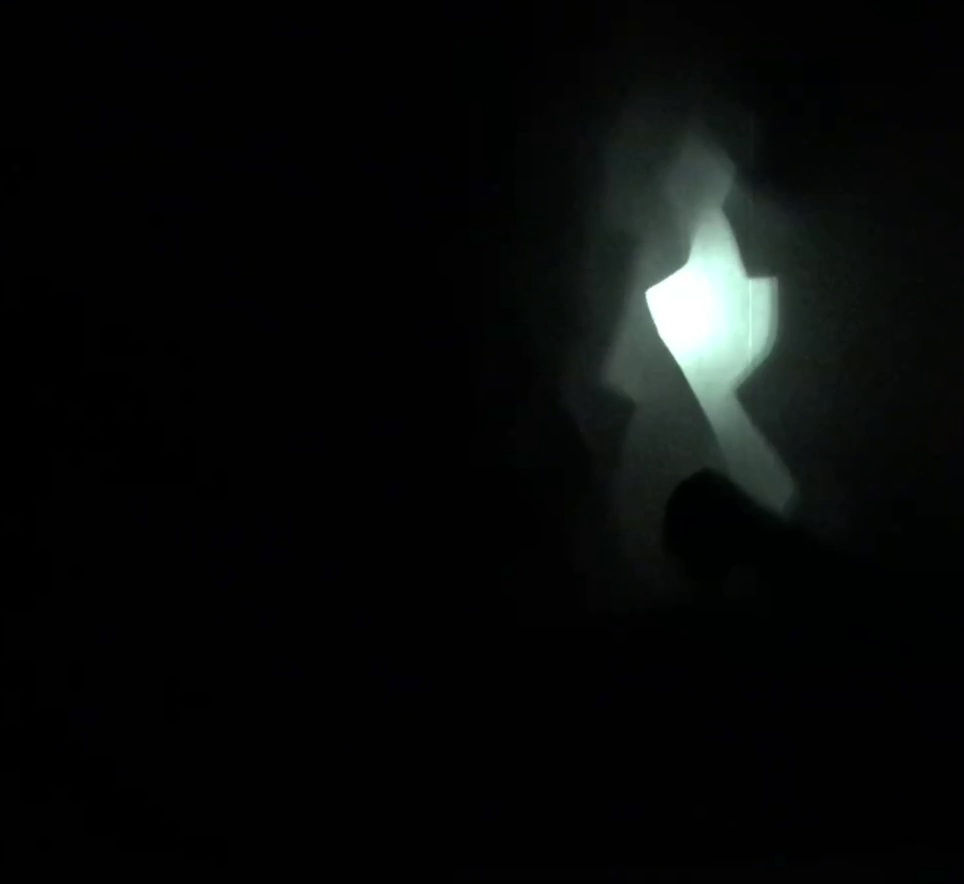

In [8]:
img

In [9]:
def img_difference(im1, im2):
    return np.mean((np.array(im1) - np.array(im2)) ** 2)

im1 = Image.open(os.path.join(data_dir, filenames[10]))
im2 = Image.open(os.path.join(data_dir, filenames[50]))
im3 = Image.open(os.path.join(data_dir, filenames[-1]))
print(img_difference(im1, im2))
print(img_difference(im1, im3))

39.183537985893366
5.112642224141492


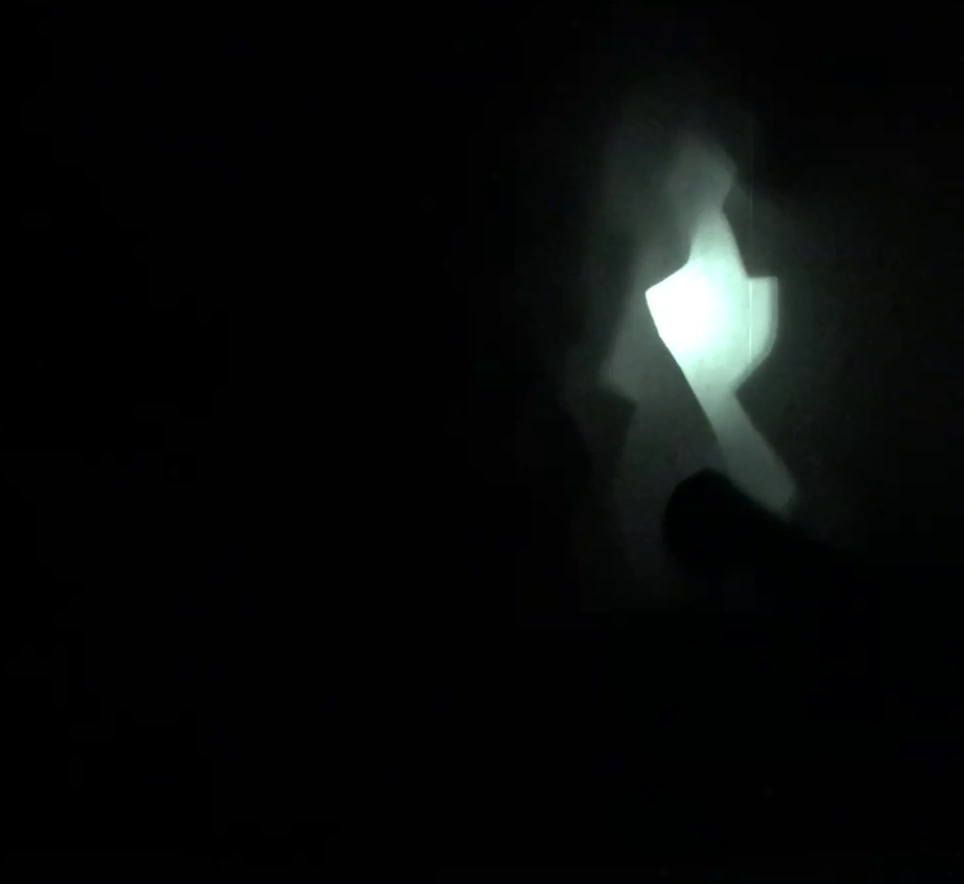

In [10]:
im1

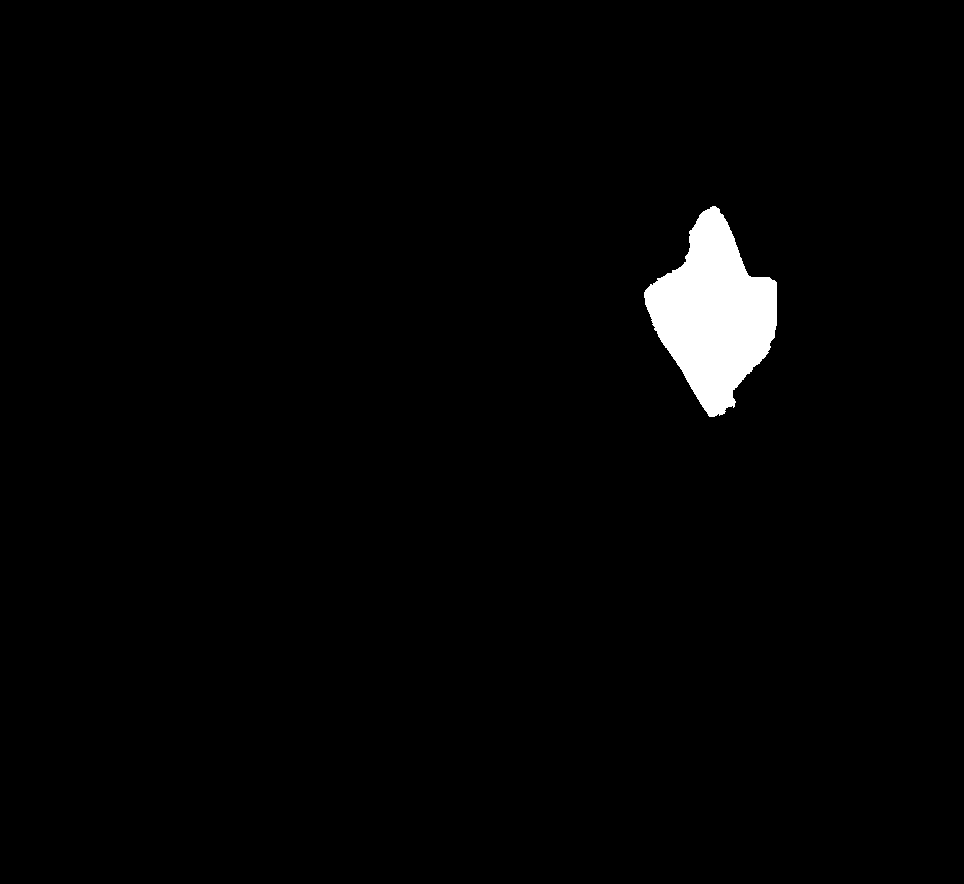

In [11]:
def im_mask(im, thresh=100):
    data = ((np.array(im) > thresh)[:, :, 0]*255).astype('uint8')
    return Image.fromarray(data).convert('RGB')

im_mask(im1)

In [12]:
im_last = Image.open(os.path.join(data_dir, filenames[0]))
image_ids = []
change_started = False
diff_ewma = 0
count = 0
for i, filename in enumerate(filenames):
    im_next = Image.open(os.path.join(data_dir, filename))
    diff = img_difference(im_mask(im_last), im_mask(im_next))
    diff_ewma = 0.6*diff_ewma + 0.4*diff
    if change_started:
        if diff_ewma < 0.001 or count > 4:
            image_ids.append(i)
            im = im_next
            change_started = False
            print(f"{i}: image {len(image_ids)}: {filename}")
        else:
            print(f"{i}: {diff:.3f} changing...")
        count += 1
    else:
        print(f"{i}: {diff:.3f}")
        if diff > 0.002:
            change_started = True
            count = 0
    im_last = im_next
print(f"{len(image_ids)} images")

0: 0.000
1: 0.000
2: 0.000
3: 0.000
4: 0.000
5: 0.000
6: 0.000
7: 0.000
8: 0.000
9: 0.000
10: 0.000
11: 0.000
12: 0.000
13: 0.000
14: 0.000
15: 0.000
16: 0.000
17: 0.000
18: 0.000
19: 0.000
20: 0.000
21: 0.000
22: 0.000
23: 0.000
24: 0.000
25: 0.000
26: 0.000
27: 0.000
28: 0.000
29: 0.000
30: 0.000
31: 0.000
32: 0.000
33: 0.000
34: 0.000
35: 0.000
36: 0.000
37: 0.000
38: 0.000
39: 0.000
40: 0.000
41: 0.000
42: 0.000
43: 0.008
44: 0.042 changing...
45: 0.002 changing...
46: 0.001 changing...
47: 0.001 changing...
48: 0.001 changing...
49: image 1: led-display-frame0049.jpg
50: 0.001
51: 0.001
52: 0.001
53: 0.001
54: 0.001
55: 0.001
56: 0.001
57: 0.001
58: 0.010
59: 0.041 changing...
60: 0.001 changing...
61: 0.000 changing...
62: 0.000 changing...
63: 0.000 changing...
64: image 2: led-display-frame0064.jpg
65: 0.000
66: 0.000
67: 0.000
68: 0.000
69: 0.000
70: 0.000
71: 0.000
72: 0.000
73: 0.010
74: 0.043 changing...
75: 0.000 changing...
76: 0.000 changing...
77: 0.000 changing...
78: 

512: 0.000 changing...
513: 0.000 changing...
514: 0.000 changing...
515: image 32: led-display-frame0515.jpg
516: 0.000
517: 0.000
518: 0.000
519: 0.000
520: 0.000
521: 0.000
522: 0.000
523: 0.000
524: 0.022
525: 0.010 changing...
526: 0.000 changing...
527: 0.000 changing...
528: 0.000 changing...
529: 0.000 changing...
530: image 33: led-display-frame0530.jpg
531: 0.000
532: 0.000
533: 0.000
534: 0.000
535: 0.000
536: 0.000
537: 0.000
538: 0.000
539: 0.005
540: 0.005 changing...
541: 0.001 changing...
542: 0.000 changing...
543: 0.000 changing...
544: image 34: led-display-frame0544.jpg
545: 0.001
546: 0.000
547: 0.001
548: 0.000
549: 0.000
550: 0.000
551: 0.001
552: 0.000
553: 0.000
554: 0.023
555: 0.015 changing...
556: 0.000 changing...
557: 0.000 changing...
558: 0.000 changing...
559: 0.000 changing...
560: image 35: led-display-frame0560.jpg
561: 0.000
562: 0.000
563: 0.000
564: 0.000
565: 0.000
566: 0.000
567: 0.000
568: 0.000
569: 0.018
570: 0.012 changing...
571: 0.001 chan

1004: 0.001
1005: 0.030
1006: 0.000 changing...
1007: 0.000 changing...
1008: 0.000 changing...
1009: 0.000 changing...
1010: 0.000 changing...
1011: image 65: led-display-frame1011.jpg
1012: 0.000
1013: 0.000
1014: 0.000
1015: 0.000
1016: 0.000
1017: 0.001
1018: 0.000
1019: 0.000
1020: 0.028
1021: 0.001 changing...
1022: 0.000 changing...
1023: 0.000 changing...
1024: 0.000 changing...
1025: 0.000 changing...
1026: image 66: led-display-frame1026.jpg
1027: 0.000
1028: 0.000
1029: 0.000
1030: 0.000
1031: 0.000
1032: 0.000
1033: 0.000
1034: 0.000
1035: 0.032
1036: 0.001 changing...
1037: 0.000 changing...
1038: 0.000 changing...
1039: 0.000 changing...
1040: 0.000 changing...
1041: image 67: led-display-frame1041.jpg
1042: 0.000
1043: 0.000
1044: 0.000
1045: 0.001
1046: 0.000
1047: 0.000
1048: 0.000
1049: 0.001
1050: 0.021
1051: 0.002 changing...
1052: 0.002 changing...
1053: 0.002 changing...
1054: 0.003 changing...
1055: 0.002 changing...
1056: image 68: led-display-frame1056.jpg
1057

In [13]:
print(f"{len(image_ids)} images selected")

88 images selected


In [19]:
np.arange(len(image_ids))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [20]:
# Differences between image positions in sequence
np.vstack([np.arange(len(image_ids)), 
           np.array(image_ids),
           np.hstack([0, np.diff(np.array(image_ids))])]).T

array([[   0,   49,    0],
       [   1,   64,   15],
       [   2,   79,   15],
       [   3,   94,   15],
       [   4,  109,   15],
       [   5,  124,   15],
       [   6,  139,   15],
       [   7,  155,   16],
       [   8,  169,   14],
       [   9,  185,   16],
       [  10,  200,   15],
       [  11,  215,   15],
       [  12,  230,   15],
       [  13,  245,   15],
       [  14,  260,   15],
       [  15,  275,   15],
       [  16,  290,   15],
       [  17,  305,   15],
       [  18,  320,   15],
       [  19,  335,   15],
       [  20,  348,   13],
       [  21,  365,   17],
       [  22,  380,   15],
       [  23,  395,   15],
       [  24,  410,   15],
       [  25,  420,   10],
       [  26,  440,   20],
       [  27,  455,   15],
       [  28,  470,   15],
       [  29,  485,   15],
       [  30,  500,   15],
       [  31,  515,   15],
       [  32,  530,   15],
       [  33,  544,   14],
       [  34,  560,   16],
       [  35,  575,   15],
       [  36,  590,   15],
 

In [23]:
# Find images too close together:
drop_images = [1064, 1198]
image_ids = [image_id for i, image_id in enumerate(image_ids) if image_ids[i] not in drop_images]
print(f"{len(image_ids)} images retained")
assert(len(image_ids) == 86)

86 images retained


In [24]:
# Save images
images = []
image_masks = []
for i, img_id in enumerate(image_ids):
    filename = filenames[img_id]
    img = Image.open(os.path.join(data_dir, filename))
    img.save(os.path.join(image_dir, f"im_{i:03d}.png"))
    images.append(img)

    img_mask = im_mask(img, thresh=100)
    img_mask.save(os.path.join(image_dir, f"im_{i:03d}_mask.png"))
    image_masks.append(img_mask)
print(f"{len(image_ids)} mask images saved to '{image_dir}'.")

86 mask images saved to 'images'.


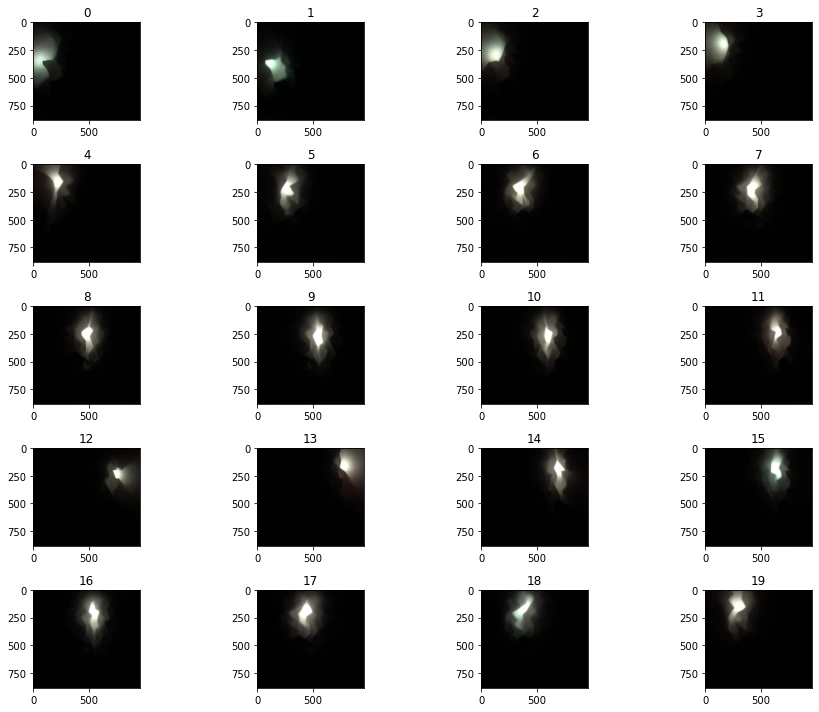

In [25]:
# Display selected mask images
selection = range(20)
fig, axes = plt.subplots(5, 4, figsize=(13, 10))
for i, img_id in enumerate(selection):
    ax = axes[i // 4, i % 4]
    img = images[img_id]
    ax.imshow(img)
    ax.set_title(img_id)
plt.tight_layout()
plt.show()

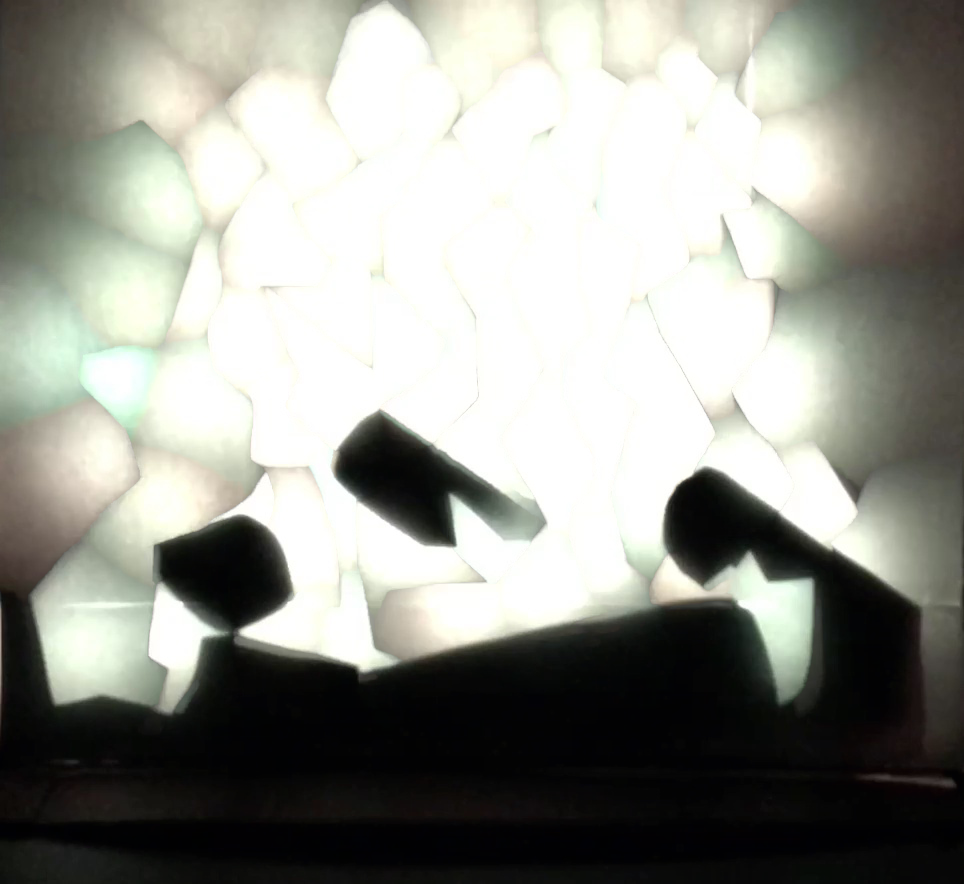

In [26]:
# Show all images combined
im_data = np.zeros(list(reversed(images[0].size)) + [3]).astype('uint8')
for i, image in enumerate(images):
    im_data = np.maximum(im_data, np.array(image))
    im = image.resize((40, 40), Image.ANTIALIAS)
all_masks = Image.fromarray(im_data)
all_masks

In [27]:
all_masks.save(os.path.join(image_dir, f"all_masks_{len(images)}.png"))

## Load individual masks

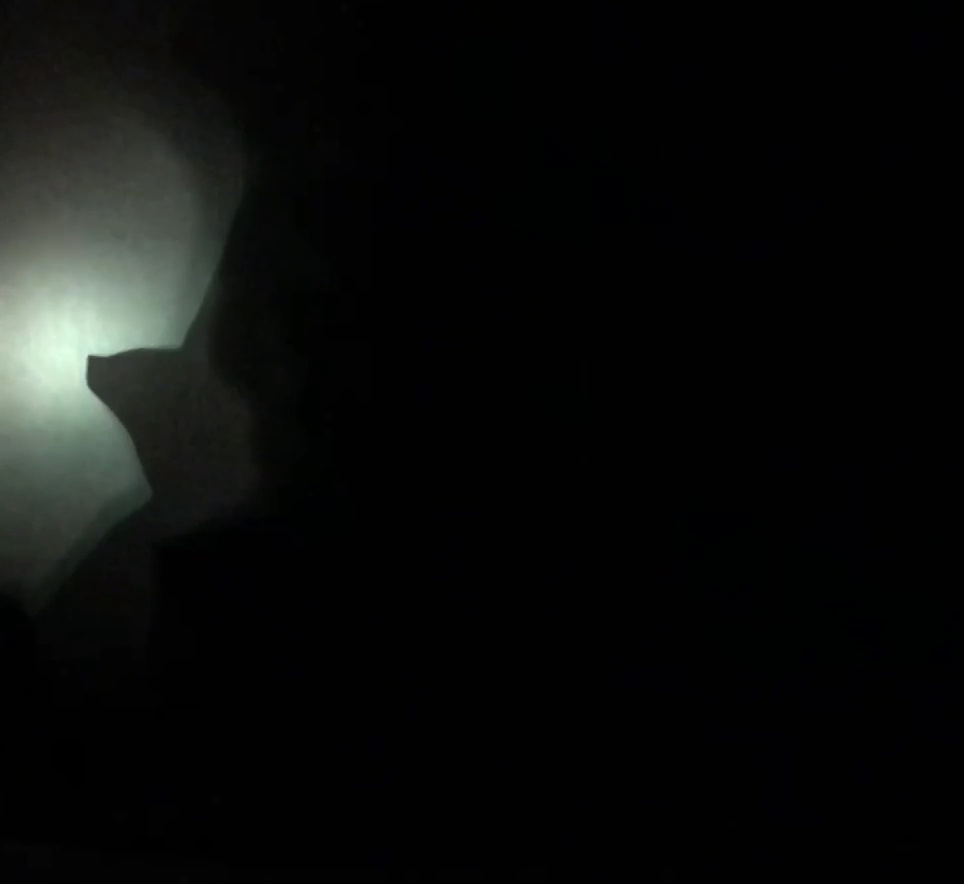

In [28]:
i = 0
img = Image.open(os.path.join(image_dir, f"im_{i:03d}.png"))
img